Draw the bounding boxes over a set of text.

## From -- http://stackoverflow.com/a/23672571/191450
 
This is the second answer to the Question.

After running all of the implementations on my own dataset (private) against the options that were presented in the StackOverflow answers. This is the one that really worked the best, clearly it'll need some additional changes as I get a better understanding of what's going on.

Presented here for your use.

In [10]:
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
import IPython.display


In [14]:
# The image that we want to use

path = '../img/bcard1.jpg'

In [15]:
def showimage(cimg):
    if len(cimg.shape) == 2:
        img = Image.fromarray(cimg)
    else:
        img = Image.fromarray(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))
    b = BytesIO()
    img.save(b, format='png')

    IPython.display.display(IPython.display.Image(data=b.getvalue(), format='png', embed=True))

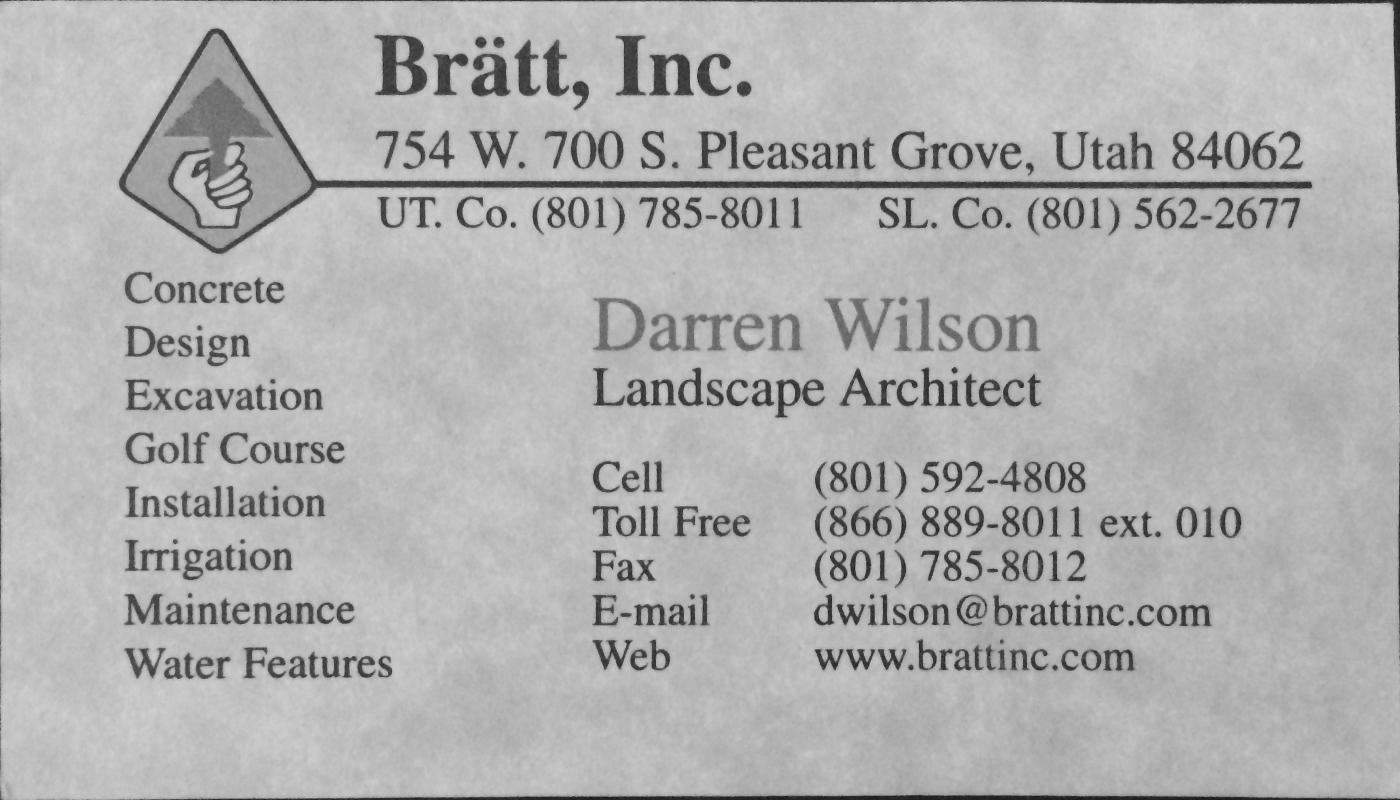

In [16]:
large = cv2.imread(path)

showimage(large)

In [17]:
def hiter(hierarcy):
    """Iterate through the next elements of the hierarchy"""
    idx = 0
    while idx >= 0:
        yield idx
        idx = hierarchy[0][idx][0]

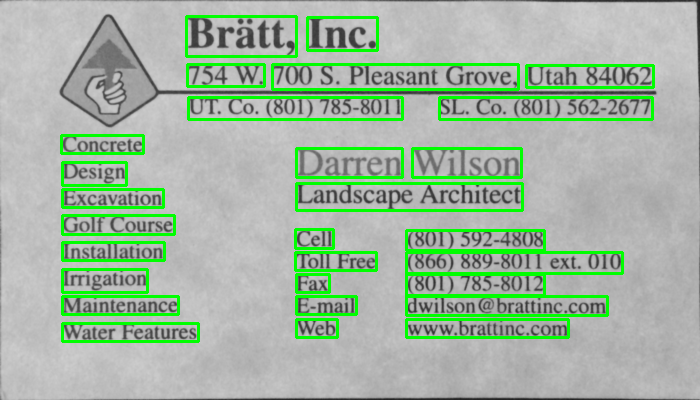

In [18]:
rgb = cv2.pyrDown(large)
small = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
#showimage(small)

morphKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
grad = cv2.morphologyEx(small, cv2.MORPH_GRADIENT, morphKernel)

# Binaarize
_, bw = cv2.threshold(grad, 0.0, 255.0, cv2.THRESH_BINARY|cv2.THRESH_OTSU)

#showimage(bw)

# Connect horizontally oriented regions
morphKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 1))
connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, morphKernel)

# Find contours
_, contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
#_, contours, hierarchy = cv2.findContours(bw.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = rgb.copy()

# Filter contours
for idx in hiter(hierarchy):
    x, y, w, h = cv2.boundingRect(contours[idx])
    
    # Fill the contours
    mask = np.zeros(bw.shape, dtype=np.uint8)
    cv2.drawContours(mask, contours, idx, (255,255,255), cv2.FILLED)
    
    # Ratio of the non-zero to zero pixels in the filled region
    r = float(cv2.countNonZero(mask)) / float(w * h)
    if r > 0.45 and w > 8 and h > 8:
        cv2.rectangle(output, (x, y), (x+w, y+h), (0, 255, 0), 2)

showimage(output)